<a href="https://colab.research.google.com/github/kinglider/Machine-Learning-Adventures/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hand Written Digit Classification Using Deep Convolutional Neural Network**

#**Notebook Imports**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


#**Defining the model**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


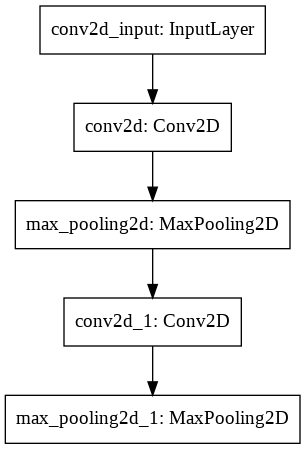

In [ ]:
keras.utils.plot_model(model, 'digit-classifier.png')

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
____________________________________________________

#**Getting The Data**

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

#**Preprocessing**

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images/255.0
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images/255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

#**Compiling The Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'sgd',metrics=['accuracy'])

#**Fitting The Model**

In [ ]:
model.fit(train_images, train_labels,batch_size = 100, epochs = 5, verbose = 1)

Epoch 1/5
600/600 [==============================] - 50s 84ms/step - loss: 0.8787 - accuracy: 0.7790
Epoch 2/5
600/600 [==============================] - 51s 86ms/step - loss: 0.2477 - accuracy: 0.9278
Epoch 3/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1807 - accuracy: 0.9473
Epoch 4/5
600/600 [==============================] - 51s 86ms/step - loss: 0.1468 - accuracy: 0.9569
Epoch 5/5
600/600 [==============================] - 51s 85ms/step - loss: 0.1255 - accuracy: 0.9632


#**Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.1045 - accuracy: 0.9707


In [ ]:
prediction = model.predict(test_images)

In [ ]:
prediction[0]

In [ ]:
np.argmax(prediction[0])

In [ ]:
test_labels[0]

In [ ]:
test_labels.shape

In [ ]:
prediction.shape

In [ ]:
rounded = np.argmax(test_labels, axis=1)

In [ ]:
conf = confusion_matrix(rounded, model.predict_classes(test_images))
plt.figure(figsize=[7,7])
#plt.colorbar(mappable=cm.ScalarMappable)
plt.imshow(conf, cmap='Greens')
plt.title('Confusion Matrix')

In [ ]:
for i in range(10000):
  check_array = (prediction[i] == test_labels[i])
(test_labels == False).any()